# Multiple Qubits and Entagled States


## 1. Introduction

We have seen some interesting effects with single qubits and single qubit gates, but the true power of quantum computing is realised through the interactions between qubits. In this section we will introduce multiple qubit gates and explore the interesting behaviours of multi-qubit systems.

Typically, the gates that can be directly implemented in hardware will act only on one or two qubits. In our circuits, we may want to use complex gates that act on a great number of qubits. Fortunately, this will not be a problem. With the one and two qubit gates given to us by the hardware, it is possible to build any other gate.

In this chapter we will first introduce the most basic multi-qubit gates, as well as the mathematics used to describe and analyse them. Then we'll show how to prove that these gates can be used to create any possible quantum algorithm. The chapter then concludes by looking at small-scale uses of quantum gates. For example, we see how to build three-qubit gates like the Toffoli from single- and two-qubit operations.

<div align="center"> <img src="https://qiskit.org/textbook/ch-gates/images/basic3.png">  </div>


## 2. Representing Multi-Qubit states 

Single qubits are interesting, but individually they offer no computational advantage. We will now look at how we represent multiple qubits, and how these qubits can interact with each other. We have seen how we can represent the state of a qubit using a 2D-vector, now we will see how we can represent the state of multiple qubits.

We saw that a single bit has two possible states, and a qubit state has two complex amplitudes. Similarly, two bits have four possible states:
```
    00 01 10 11
```

And to describe the state of two qubits requires four complex amplitudes. We store these amplitudes in a 4D-vector like so:

$$ |a\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix} $$

The rules of measurement still work in the same way:

$$ p(|00\rangle) = |\langle 00 | a \rangle |^2 = |a_{00}|^2 $$

And the same implications hold, such as the normalisation condition:

$$ |a_{00}|^2 + |a_{01}|^2 + |a_{10}|^2 + |a_{11}|^2 = 1 $$

If we have two separated qubits, we can describe their collective state using the kronecker product:

$$ |a\rangle = \begin{bmatrix} a_0 \\ a_1 \end{bmatrix}, \quad |b\rangle = \begin{bmatrix} b_0 \\ b_1 \end{bmatrix} $$
$$ |ba\rangle = |b\rangle \otimes |a\rangle = \begin{bmatrix} b_0 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \\ b_1 \times \begin{bmatrix} a_0 \\ a_1 \end{bmatrix} \end{bmatrix} = \begin{bmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{bmatrix} $$

And following the same rules, we can use the kronecker product to describe the collective state of any number of qubits. Here is an example with three qubits:

$$ |cba\rangle = \begin{bmatrix} c_0 b_0 a_0 \\ c_0 b_0 a_1 \\ c_0 b_1 a_0 \\ c_0 b_1 a_1 \\
                              c_1 b_0 a_0 \\ c_1 b_0 a_1 \\ c_1 b_1 a_0 \\ c_1 b_1 a_1 \\
              \end{bmatrix} $$

If we have $n$ qubits, we will need to keep track of $2n$ complex amplitudes. As we can see, these vectors grow exponentially with the number of qubits. This is the reason quantum computers with large numbers of qubits are so difficult to simulate. A modern laptop can easily simulate a general quantum state of around 20 qubits, but simulating 100 qubits is too difficult for the largest supercomputers.

Let's look at an example circuit:

In [16]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex, plot_state_qsphere

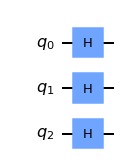

In [2]:
qc = QuantumCircuit(3)

# apply an H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)

qc.draw(output="mpl")

Each qubit is in the state $|+\rangle$, so we should see the vector:

$$ |{+++}\rangle = \frac{1}{\sqrt{8}}\begin{bmatrix} 1 \\ 1 \\ 1 \\ 1 \\
                              1 \\ 1 \\ 1 \\ 1 \\
              \end{bmatrix} $$

In [3]:
sim = Aer.get_backend('aer_simulator')

qc.save_statevector()
final_state = sim.run(qc).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex. If not using Jupyter Notebooks 
# you may need to remove the array_to_latex function and use print(final_state) instead.
#
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

And we have our expected result.

Other examples of kronecker product between qubits' states that will come in handy in the following sections are:
- $|0\rangle |1\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}$ 
- $|0\rangle |+\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \\ 0 \\ 0 \end{bmatrix}$
- $|+\rangle |1\rangle = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 0 \\ 1 \\ 0 \\ 1 \end{bmatrix}$
- $|-\rangle |+\rangle = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \\ -1 \\ -1 \end{bmatrix}$

We can also interpret multiple-states qubits in terms of their kronecker factorization, as an example:

$$ |\psi\rangle = \tfrac{1}{\sqrt{2}} (|00\rangle + i|01\rangle) = \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \\ 0 \\ 0 \end{bmatrix} = |0\rangle \otimes \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i \end{bmatrix} = |0\rangle |\circlearrowleft\rangle $$

## 3. Single Qubit Gates on Multi-Qubit Statevectors

We have seen that an $X$-gate is represented by the matrix:

$$ X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} $$

And that it acts on the state $|0\rangle$ as so:

$$ X|0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1\end{bmatrix} $$

but it may not be clear how an $X$-gate would act on a qubit in a multi-qubit vector. Fortunately, the rule is quite simple; just as we used the kronecker product to calculate multi-qubit statevectors, we use the tensor product to calculate matrices that act on these statevectors. For example, in the circuit below:

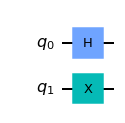

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw(output="mpl")

we can represent the simultaneous operations ($H$ & $X$) using their kronecker product:

$$ X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle $$

The operation looks like this:

$$ X\otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} $$

$$ = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\ 
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} $$ 

$$ = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix} $$

Which we can then apply to our 4D statevector $|q_1q_0\rangle$. This can become quite messy, you will often see the clearer notation:

$$ X\otimes H = 
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix} $$

Instead of calculating this by hand, we can use Qiskit’s `aer_simulator` to calculate this for us. The Aer simulator multiplies all the gates in our circuit together to compile a single unitary matrix that performs the whole quantum circuit:

In [5]:
#usim = Aer.get_backend('aer_simulator')
qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()

and view the results:

In [6]:
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

If we want to apply a gate to only one qubit at a time (such as in the circuit below), we describe this using kronecker product with the identity matrix, e.g.:

$$ X \otimes I $$

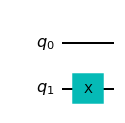

In [7]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw(output="mpl")

In [8]:
qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

We can see Qiskit has performed the kronecker product: 

$$ X \otimes I =
\begin{bmatrix} 0 & I \\
               I & 0\\
\end{bmatrix} = 
\begin{bmatrix} 0 & 0 & 1 & 0 \\
                0 & 0 & 0 & 1 \\
                1 & 0 & 0 & 0 \\
                0 & 1 & 0 & 0 \\
\end{bmatrix} $$

This rules applies for any gate and for an arbitrary number of them; as an example the unitary of the operation $U=XZH$ is

$$ U = X \otimes Z \otimes H = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \tfrac{1}{\sqrt{2}} \begin{bmatrix} -1 & 1 \\ 1 & 1 \end{bmatrix} $$

which we can again check with Qiskit's Aer simulator:

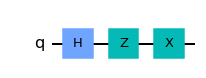

In [22]:
qc = QuantumCircuit(1)

qc.h(0)
qc.z(0)
qc.x(0)

qc.draw(output="mpl")

In [23]:
qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{$U = XZH =$ } ")

<IPython.core.display.Latex object>

Which is the oputput we expected.

## 4. Multi-Qubit Gates

Now we know how to represent the state of multiple qubits, we are now ready to learn how qubits interact with each other. An important two-qubit gate is the $CNOT$-gate.

### 4.1 The $CNOT$-Gate

You have come across this gate before in The Atoms of Computation. This gate is a conditional gate that performs an $X$-gate on the second qubit (target), if the state of the first qubit (control) is $|1\rangle$. The gate is drawn on a circuit like this, with $q_0$ as the control and $q_1$ as the target:

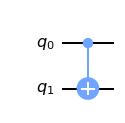

In [9]:
qc = QuantumCircuit(2)
qc.cx(0,1)
qc.draw(output="mpl")

When our qubits are not in superposition of $|0\rangle$ or $|1\rangle$ (behaving as classical bits), this gate operates by leaving the control qubit unchanged and overwriting the $XOR$ between the two on the second qubit.

When acting on our 4D-statevector, it has one of the two matrices:

$$ \text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
                              0 & 1 & 0 & 0 \\
              \end{bmatrix}, \quad
\text{CNOT} = \begin{bmatrix} 1 & 0 & 0 & 0 \\
                              0 & 1 & 0 & 0 \\
                              0 & 0 & 0 & 1 \\
                              0 & 0 & 1 & 0 \\
              \end{bmatrix} $$

depending on which qubit is the control and which is the target. Different books, simulators and papers order their qubits differently. In our case, the left matrix corresponds to the $CNOT$ in the circuit above. This matrix swaps the amplitudes of $|01\rangle$ and $|11\rangle$ in our statevector:

$$ |a\rangle = \begin{bmatrix} a_{00} \\ a_{01} \\ a_{10} \\ a_{11} \end{bmatrix}, \quad \text{CNOT}|a\rangle = \begin{bmatrix} a_{00} \\ a_{11} \\ a_{10} \\ a_{01} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix} $$

We have seen how this acts on classical states, but let’s now see how it acts on a qubit in superposition. We will put one qubit in the state $|+\rangle$:

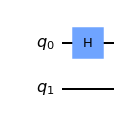

In [10]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw(output="mpl")

In [11]:
qc.save_statevector()

final_state = sim.run(qc).result().get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

As expected, this produces the state $|0\rangle \otimes |+\rangle = |0+\rangle$:

$$ |0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |01\rangle) $$

And let’s see what happens when we apply the $CNOT$ gate:

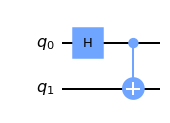

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw(output="mpl")

In [13]:
qc.save_statevector()

result = sim.run(qc).result()
final_state = result.get_statevector()

array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

We see we have the state:

$$ \text{CNOT}|0{+}\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $$

This state is very interesting to us, because it is entangled. This leads us neatly on to the next section.


### 4.2 Entangled States 

We saw in the previous section we could create the state:

$$ \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $$

This is known as a Bell state. We can see that this state has 50% probability of being measured in the state $|00\rangle$, and 50% chance of being measured in the state $|11\rangle$. Most interestingly, it has a 0% chance of being measured in the states $|01\rangle$ or $|10\rangle$. We can see this in Qiskit:

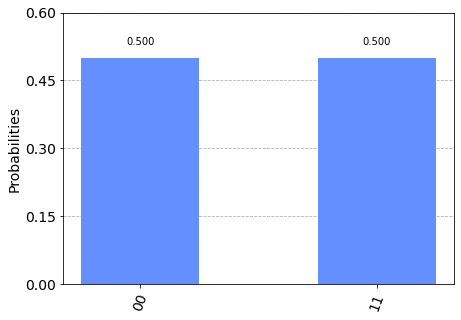

In [14]:
plot_histogram(result.get_counts())

This combined state cannot be written as two separate qubit states, which has interesting implications. Although our qubits are in superposition, measuring one will tell us the state of the other and collapse its superposition. For example, if we measured the top qubit and got the state $|1\rangle$, the collective state of our qubits changes like so:

$$ \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \quad \xrightarrow[]{\text{measure}} \quad |11\rangle $$

Even if we separated these qubits light-years away, measuring one qubit collapses the superposition and appears to have an immediate effect on the other. This is the ‘spooky action at a distance’ that upset so many physicists in the early 20th century.

It’s important to note that the measurement result is random, and the measurement statistics of one qubit are not affected by any operation on the other qubit. Because of this, there is no way to use shared quantum states to communicate. This is known as the __[no-communication theorem](https://arxiv.org/abs/quant-ph/0212023)__.

### 4.3 Visualizing Entangled States 

We have seen that this state cannot be written as two separate qubit states, this also means we lose information when we try to plot our state on separate Bloch spheres:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


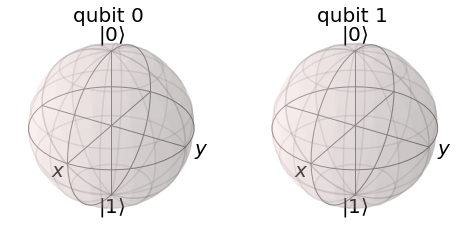

In [15]:
plot_bloch_multivector(final_state)

Given how we defined the Bloch sphere in the earlier chapters, it may not be clear how Qiskit even calculates the Bloch vectors with entangled qubits like this. In the single-qubit case, the position of the Bloch vector along an axis nicely corresponds to the expectation value of measuring in that basis. If we take this as the rule of plotting Bloch vectors, we arrive at this conclusion above. This shows us there is no single-qubit measurement basis for which a specific measurement is guaranteed. This contrasts with our single qubit states, in which we could always pick a single-qubit basis. Looking at the individual qubits in this way, we miss the important effect of correlation between the qubits. We cannot distinguish between different entangled states. For example, the two states:

$$ \tfrac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \quad \text{and} \quad \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle) $$

will both look the same on these separate Bloch spheres, despite being very different states with different measurement outcomes.

How else could we visualize this statevector? This statevector is simply a collection of four amplitudes (complex numbers), and there are endless ways we can map this to an image. One such visualization is the Q-sphere, here each amplitude is represented by a blob on the surface of a sphere. The size of the blob is proportional to the magnitude of the amplitude, and the colour is proportional to the phase of the amplitude. The amplitudes for $|00\rangle$ and $|11\rangle$ are equal, and all other amplitudes are 0:

c:\Python38\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


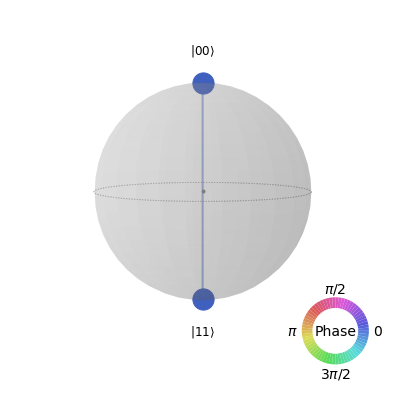

In [17]:
plot_state_qsphere(final_state)

Here we can clearly see the correlation between the qubits. The Q-sphere's shape has no significance, it is simply a nice way of arranging our blobs; the number of 0s in the state is proportional to the states position on the Z-axis, so here we can see the amplitude of $|00\rangle$ is at the top pole of the sphere, and the amplitude of $|11\rangle$ is at the bottom pole of the sphere.

The Bell state we generated before is not the only instance of a two-qubit entangled system. Another such state is

$$ |\psi\rangle = \tfrac{1}{\sqrt{2}} (|01\rangle + |10\rangle ) $$

which can be created with a reasoning similar to the one before, i.e., it is the result of

$$ \tfrac{1}{\sqrt{2}} (|01\rangle + |10\rangle ) = CNOT |1+\rangle = \begin{bmatrix} 0 \\ 1 \\ 1 \\ 0 \end{bmatrix} $$

We can verify this with Qiskit:

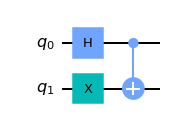

In [42]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0, 1)

qc.draw(output="mpl")

In [43]:
qc.save_statevector()

statevector = sim.run(qc).result().get_statevector()
array_to_latex(statevector, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

We can also use Qiskit to calculate the overall unitary of this circuit, which transform the initial $|00\rangle$ input state into $|1+\rangle$ with

$$ (X \otimes H) |00\rangle = |1+\rangle$$ 

and then applies a $CNOT$ between the first and second qubit of such initialized qubits.

In [47]:
qc = QuantumCircuit(2)

qc.h(0)
qc.x(1)
qc.cx(0, 1)

qc.save_unitary()

unitary = sim.run(qc).result().get_unitary()
array_to_latex(unitary, prefix="\\text{$CNOT(X\\otimes H)|00\\rangle =$ }")

<IPython.core.display.Latex object>